In [ ]:
+import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
df = pd.read_csv("./dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Diabetes')

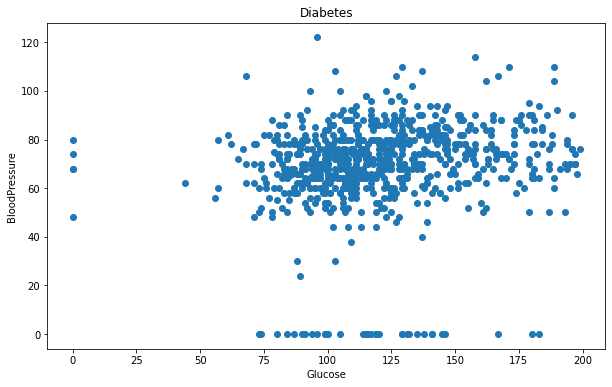

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Glucose'],df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Diabetes')

In [ ]:
X = df.iloc[:, [1,2]].values
X[:5]

array([[148,  72],
       [ 85,  66],
       [183,  64],
       [ 89,  66],
       [137,  40]], dtype=int64)

In [ ]:
X[1,1]

66

In [ ]:
len(X)

768

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


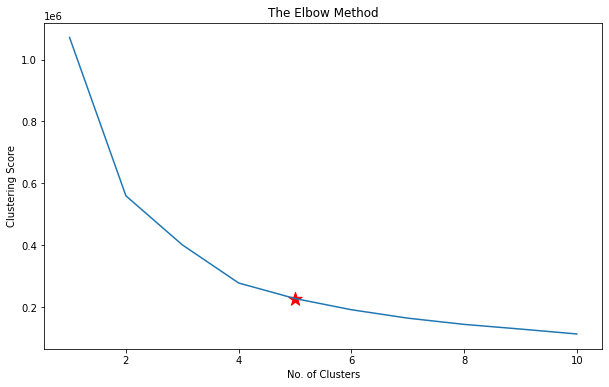

In [ ]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    #kmeans = KMeans(n_clusters=i, init ='k-means++',random_state=0 )
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([0, 4, 2, 4, 0, 1, 4, 3, 2, 0, 1, 2, 0, 2, 2, 3, 0, 1, 3, 1, 0, 1,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 4, 1, 0, 1, 0, 1, 4, 1, 2, 0, 1, 2,
       2, 2, 0, 4, 1, 3, 1, 1, 4, 2, 0, 4, 2, 1, 0, 1, 3, 0, 4, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 4, 4, 4, 1, 3, 1, 1, 3, 4, 1, 0, 1, 1, 1,
       0, 1, 4, 0, 4, 0, 0, 0, 1, 4, 1, 0, 2, 0, 0, 4, 4, 0, 1, 0, 4, 1,
       2, 2, 4, 4, 2, 0, 0, 4, 1, 1, 2, 1, 1, 0, 1, 3, 0, 1, 0, 1, 2, 1,
       2, 4, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 4, 1, 0, 4, 0, 1, 2, 0,
       2, 0, 1, 1, 4, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 3, 4, 4, 2,
       4, 0, 0, 0, 4, 1, 4, 4, 0, 2, 2, 0, 1, 0, 1, 0, 2, 3, 4, 2, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 2, 4, 0, 2, 0, 1, 0, 1, 0, 4, 1,
       2, 2, 3, 0, 1, 4, 1, 2, 2, 1, 0, 0, 4, 0, 4, 2, 2, 2, 2, 1, 4, 4,
       0, 1, 0, 2, 0, 2, 0, 1, 1, 0, 4, 4, 1, 1, 1, 1, 2, 2, 2, 3, 1, 0,
       0, 1, 3, 0, 1, 3, 1, 1, 0, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0,
       2, 0, 1, 1, 4, 1, 0, 0, 2, 0, 0, 0, 1, 1, 3,

In [ ]:
score = silhouette_score(X, pred)
print("Silhouette Score:", score)

Silhouette Score: 0.3596759832266028


In [ ]:
len(pred)

768

In [ ]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())

Number of data points in each cluster= 
 1    265
0    225
2    125
4    115
3     38
Name: Cluster, dtype: int64


Text(0.5, 1.0, 'Clusters')

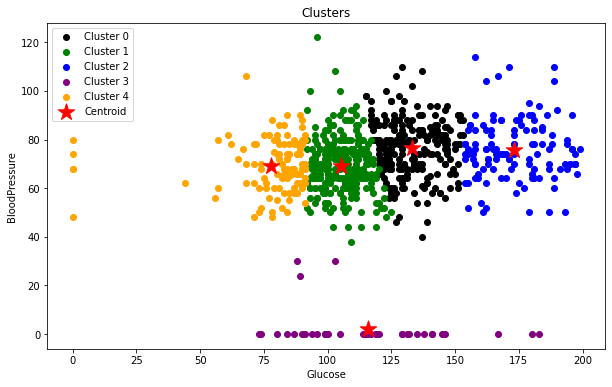

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'black', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.title('Clusters')

In [ ]:
kmeans.cluster_centers_[:,0]

array([133.06666667, 105.30566038, 173.264     , 115.86842105,
        77.73913043])

In [ ]:
kmeans.cluster_centers_[:,1]

array([76.52      , 69.16603774, 75.88      ,  2.21052632, 69.2       ])

In [ ]:
distance = []
max0 = max1 = max2 = max3 = max4 = 0
for i in range(0, len(X)):
    if pred[i]==0:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][0])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][0])**2)
        if d>max0:
            max0=d
    if pred[i]==1:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][1])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][1])**2)
        if d>max1:
            max1=d
    if pred[i]==2:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][2])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][2])**2)
        if d>max2:
            max2=d
    if pred[i]==3:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][3])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][3])**2)
        if d>max3:
            max3=d
    if pred[i]==4:
        d = np.sqrt((X[:, 0][i] - kmeans.cluster_centers_[:,0][4])**2+(X[:, 1][i] - kmeans.cluster_centers_[:,1][4])**2)
        if d>max4:
            max4=d
    distance.append(d) 

In [ ]:
distance

[15.602398675987116,
 7.934748064248807,
 15.359820832288365,
 11.706715310659918,
 36.73120623000436,
 11.736102041803973,
 19.20177212993782,
 2.3749908878670554,
 24.45346797491103,
 21.084153080242782,
 23.31151340375333,
 5.589641848991766,
 6.878578664553057,
 22.35611987801102,
 8.235295744537662,
 16.021648270274778,
 16.821261678139496,
 5.122302014532944,
 30.624354818236423,
 9.73014459179024,
 13.480659396994563,
 16.118554192260635,
 26.76378329011053,
 14.490738804875031,
 20.105260781972248,
 10.37215074664416,
 13.943033306199116,
 8.888632585996739,
 13.131444872688023,
 22.310718898721703,
 6.905306723597161,
 15.264471690825081,
 15.189649246589093,
 26.427834394030036,
 11.165191942421368,
 9.45157751651701,
 4.960663038120792,
 7.591470921914734,
 12.319453011204438,
 6.360569616993163,
 13.656796696150959,
 7.480297082632782,
 22.84451663293052,
 34.195030282191595,
 18.56329970667931,
 11.957763001498222,
 24.255752124209856,
 6.786448188633965,
 3.91661393560064

In [ ]:
len(distance)

768

In [ ]:
max0

36.73120623000436

In [ ]:
max1

53.64720760289826

In [ ]:
max2

41.062441427659905

In [ ]:
max3

67.1679634837886

In [ ]:
max4

80.57798955518898

In [ ]:
l0 = float(input("Enter lambda 0 value: "))
l1 = float(input("Enter lambda 1 value: "))
l2 = float(input("Enter lambda 2 value: "))
l3 = float(input("Enter lambda 3 value: "))
l4 = float(input("Enter lambda 4 value: "))

Enter lambda 0 value: 21
Enter lambda 1 value: 38
Enter lambda 2 value: 26
Enter lambda 3 value: 52
Enter lambda 4 value: 65


Text(0.5, 1.0, 'Clusters')

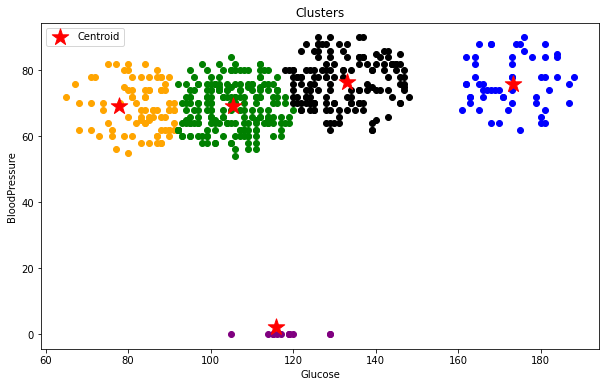

In [ ]:
c0=c1=c2=c3=c4=0
coordinates =[]
plt.figure(figsize=(10,6))
for i in range(0, len(X)):
    if pred[i]==0:
        if distance[i]<=max0-l0:
            plt.scatter(X[pred == 0, 0][c0], X[pred == 0, 1][c0], c = 'black')#, label = 'Cluster 0')
            coordinates.append((X[pred == 0, 0][c0],X[pred == 0, 1][c0]))
            c0=c0+1
        else:
            c0=c0+1
    if pred[i]==1:
        if distance[i]<=max1-l1:
            plt.scatter(X[pred == 1, 0][c1], X[pred == 1, 1][c1], c = 'green')#, label = 'Cluster 1')
            coordinates.append((X[pred == 1, 0][c1],X[pred == 1, 1][c1]))
            c1=c1+1
        else:
            c1=c1+1
    if pred[i]==2:
        if distance[i]<=max2-l2:
            plt.scatter(X[pred == 2, 0][c2], X[pred == 2, 1][c2], c = 'blue')#, label = 'Cluster 2')
            coordinates.append((X[pred == 2, 0][c2],X[pred == 2, 1][c2]))
            c2=c2+1
        else:
            c2=c2+1
    if pred[i]==3:
        if distance[i]<=max3-l3:
            plt.scatter(X[pred == 3, 0][c3], X[pred == 3, 1][c3], c = 'purple')#, label = 'Cluster 3')
            coordinates.append((X[pred == 3, 0][c3],X[pred == 3, 1][c3]))
            c3=c3+1
        else:
            c3=c3+1
    if pred[i]==4:
        if distance[i]<=max4-l4:
            plt.scatter(X[pred == 4, 0][c4], X[pred == 4, 1][c4], c = 'orange')# , label = 'Cluster 4')
            coordinates.append((X[pred == 4, 0][c4],X[pred == 4, 1][c4]))
            c4=c4+1
        else:
            c4=c4+1
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.legend()
plt.title('Clusters')

In [ ]:
coordinates

[(148, 72),
 (85, 66),
 (89, 66),
 (116, 74),
 (115, 0),
 (168, 74),
 (139, 80),
 (166, 72),
 (107, 74),
 (115, 70),
 (126, 88),
 (119, 80),
 (125, 70),
 (147, 76),
 (97, 66),
 (145, 82),
 (109, 75),
 (88, 58),
 (122, 78),
 (103, 60),
 (138, 76),
 (102, 76),
 (90, 68),
 (111, 72),
 (180, 64),
 (133, 84),
 (180, 66),
 (71, 70),
 (103, 66),
 (105, 0),
 (103, 80),
 (88, 66),
 (176, 90),
 (146, 82),
 (105, 64),
 (133, 72),
 (114, 66),
 (99, 74),
 (95, 66),
 (146, 85),
 (100, 66),
 (139, 64),
 (126, 90),
 (129, 86),
 (79, 75),
 (95, 72),
 (112, 66),
 (83, 78),
 (101, 65),
 (110, 74),
 (106, 72),
 (100, 68),
 (136, 70),
 (107, 68),
 (80, 55),
 (123, 80),
 (81, 78),
 (134, 72),
 (142, 82),
 (144, 72),
 (92, 62),
 (163, 72),
 (81, 72),
 (85, 65),
 (83, 58),
 (171, 72),
 (89, 76),
 (76, 62),
 (124, 74),
 (97, 60),
 (99, 76),
 (162, 76),
 (111, 64),
 (107, 74),
 (132, 80),
 (113, 76),
 (120, 70),
 (105, 84),
 (173, 70),
 (170, 64),
 (84, 74),
 (96, 68),
 (100, 70),
 (93, 60),
 (129, 80),
 (105, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


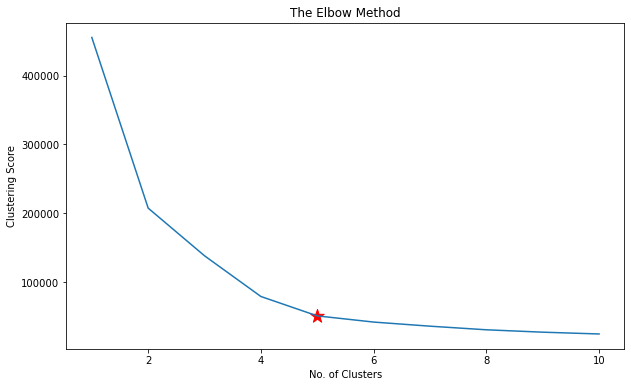

In [ ]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    #kmeans = KMeans(n_clusters=i, init ='k-means++',random_state=0 )
    kmeans.fit(coordinates)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(coordinates)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(coordinates)

pred

array([2, 1, 1, 4, 3, 0, 2, 0, 4, 4, 2, 2, 2, 2, 4, 2, 4, 1, 2, 4, 2, 4,
       1, 4, 0, 2, 0, 1, 4, 3, 4, 1, 0, 2, 4, 2, 4, 4, 1, 2, 4, 2, 2, 2,
       1, 1, 4, 1, 4, 4, 4, 4, 2, 4, 1, 2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 2, 4, 4, 0, 4, 4, 2, 4, 4, 4, 0, 0, 1, 1, 4, 1, 2, 4, 2, 4,
       4, 4, 4, 2, 1, 2, 4, 0, 4, 1, 0, 4, 4, 4, 2, 4, 4, 4, 4, 2, 1, 1,
       0, 1, 2, 2, 1, 4, 1, 2, 0, 4, 2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4,
       1, 0, 1, 2, 4, 4, 2, 1, 4, 3, 4, 1, 4, 2, 2, 1, 2, 1, 0, 0, 0, 4,
       1, 1, 2, 0, 2, 2, 2, 1, 1, 4, 4, 4, 1, 2, 4, 2, 4, 2, 1, 4, 4, 4,
       4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 1, 2, 0, 2, 2, 2, 1,
       4, 4, 4, 4, 0, 4, 4, 2, 4, 0, 4, 4, 1, 4, 1, 0, 3, 4, 0, 2, 1, 2,
       1, 2, 3, 4, 2, 1, 1, 0, 3, 1, 2, 2, 2, 4, 0, 4, 1, 4, 2, 4, 1, 4,
       4, 4, 1, 2, 4, 2, 4, 4, 0, 2, 4, 2, 1, 1, 2, 1, 0, 4, 4, 0, 4, 2,
       2, 0, 4, 2, 1, 2, 1, 4, 4, 0, 0, 1, 1, 2, 1, 2, 2, 4, 1, 4, 4, 4,
       0, 4, 1, 4, 2, 1, 2, 1, 3, 0, 1, 2, 2, 1, 1,

In [ ]:
score = silhouette_score(coordinates, pred)
print("Silhouette Score:", score)

Silhouette Score: 0.4634869911757264


In [ ]:
kmeans.cluster_centers_[:,0]

array([172.75      ,  85.55357143, 132.08053691, 118.08333333,
       106.83707865])

In [ ]:
kmeans.cluster_centers_[:,1]

array([76.23214286, 68.3125    , 76.48993289,  0.        , 69.25280899])

In [ ]:
from platform import python_version

print(python_version())

3.9.12
